In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [ ]:
X = np.array([258.0, 270.0, 294.0,
              320.0, 342.0, 368.0,
              396.0, 446.0, 480.0, 586.0])

X_quad = np.stack((X, [x**2 for x in X]), axis=1)

y = np.array([236.4, 234.4, 252.8,
              298.6, 314.2, 342.2,
              360.8, 368.0, 391.2,
              390.8])

X = X[:, np.newaxis]

X, X_quad, y

(array([[258.],
        [270.],
        [294.],
        [320.],
        [342.],
        [368.],
        [396.],
        [446.],
        [480.],
        [586.]]),
 array([[   258.,  66564.],
        [   270.,  72900.],
        [   294.,  86436.],
        [   320., 102400.],
        [   342., 116964.],
        [   368., 135424.],
        [   396., 156816.],
        [   446., 198916.],
        [   480., 230400.],
        [   586., 343396.]]),
 array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368. , 391.2,
        390.8]))

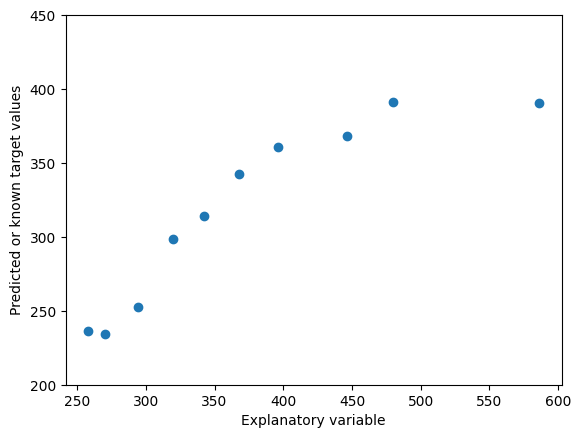

In [ ]:
plt.scatter(X, y, label='Training points')
plt.ylim(200, 450)
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values');

In [ ]:
# Clear session and set a random seed for consistent behavior.
tf.keras.backend.clear_session()
tf.random.set_seed(0)

# Use Keras Sequential API to build a linear regression model.
linear_model = keras.Sequential()

# create input layer
linear_model.add(tf.keras.Input(shape=(X.shape[1],),
    name='Input'
))

# create output layer
linear_model.add(keras.layers.Dense(
    activation = None, # linear activation is used
    units=1,           # there is a single output
    use_bias=True      # include a learned bias parameter
))

# Use mean squared error as our loss and the Adam optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
linear_model.compile(loss='mse', optimizer=optimizer)

# Return linear_model
linear_model

In [ ]:
history = linear_model.fit(X, y,
                           epochs=10_000,
                           verbose=0)
history

In [ ]:
# Use get_weights() which returns lists of weights and biases for the layer.
weights, biases = linear_model.layers[0].get_weights()
print('Weights:', weights)
print('Biases:', biases)

Weights: [[0.716]]
Biases: [45.328]


In [ ]:
X_fit = np.arange(250, 600, 10)[:, np.newaxis]

X_quad_fit = np.stack((X_fit, [x**2 for x in X_fit]), axis=1)

In [ ]:
# fit linear features
y_lin_fit = linear_model.predict(X_fit)

X_fit, y_lin_fit

2/2 [==============================] - 0s 5ms/step


(array([[250],
        [260],
        [270],
        [280],
        [290],
        [300],
        [310],
        [320],
        [330],
        [340],
        [350],
        [360],
        [370],
        [380],
        [390],
        [400],
        [410],
        [420],
        [430],
        [440],
        [450],
        [460],
        [470],
        [480],
        [490],
        [500],
        [510],
        [520],
        [530],
        [540],
        [550],
        [560],
        [570],
        [580],
        [590]]),
 array([[224.26 ],
        [231.418],
        [238.575],
        [245.732],
        [252.89 ],
        [260.047],
        [267.204],
        [274.362],
        [281.519],
        [288.676],
        [295.834],
        [302.991],
        [310.148],
        [317.305],
        [324.463],
        [331.62 ],
        [338.777],
        [345.935],
        [353.092],
        [360.249],
        [367.407],
        [374.564],
        [381.721],
        [388.879],
        [396.036]

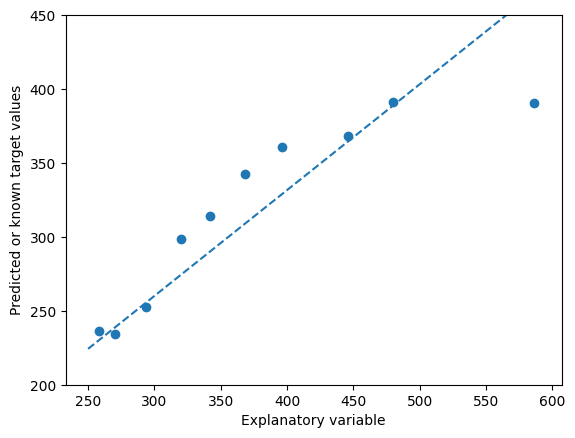

In [ ]:
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.ylim(200, 450)
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values');

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail().round(1)

,loss,epoch
9995,887.2,9995
9996,887.2,9996
9997,887.1,9997
9998,887.0,9998
9999,886.9,9999


## Exercise: Repeat the example using a quadratic model:

In [ ]:
X_quad.shape

(10, 2)

In [ ]:
# Clear session and set a random seed for consistent behavior.
tf.keras.backend.clear_session()
tf.random.set_seed(0)

# Use Keras Sequential API to build a quadratic regression model.
quadratic_model = keras.Sequential()

# create input layer
quadratic_model.add(tf.keras.Input(shape=(X_quad.shape[1],),
    name='Input'
))

# create output layer
quadratic_model.add(keras.layers.Dense(
    activation = None, # linear activation is used
    units=1,           # there is a single output
    use_bias=True      # include a learned bias parameter
))

# Use mean squared error as our loss and the Adam optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
quadratic_model.compile(loss='mse', optimizer=optimizer)

# Return quadratic_model
quadratic_model

In [ ]:
history = quadratic_model.fit(X_quad, y,
                              epochs=50_000,
                              verbose=0)
history

In [ ]:
# Use get_weights() which returns lists of weights and biases for the layer.
weights, biases = quadratic_model.layers[0].get_weights()
print('Weights:', weights)
print('Biases:', biases)

Weights: [[ 1.229]
 [-0.001]]
Biases: [-10.328]


In [ ]:
# fit quadratic features
y_quad_fit = quadratic_model.predict(X_quad_fit)

X_quad_fit, y_quad_fit

2/2 [==============================] - 0s 4ms/step


(array([[[   250],
         [ 62500]],
 
        [[   260],
         [ 67600]],
 
        [[   270],
         [ 72900]],
 
        [[   280],
         [ 78400]],
 
        [[   290],
         [ 84100]],
 
        [[   300],
         [ 90000]],
 
        [[   310],
         [ 96100]],
 
        [[   320],
         [102400]],
 
        [[   330],
         [108900]],
 
        [[   340],
         [115600]],
 
        [[   350],
         [122500]],
 
        [[   360],
         [129600]],
 
        [[   370],
         [136900]],
 
        [[   380],
         [144400]],
 
        [[   390],
         [152100]],
 
        [[   400],
         [160000]],
 
        [[   410],
         [168100]],
 
        [[   420],
         [176400]],
 
        [[   430],
         [184900]],
 
        [[   440],
         [193600]],
 
        [[   450],
         [202500]],
 
        [[   460],
         [211600]],
 
        [[   470],
         [220900]],
 
        [[   480],
         [230400]],
 
        [[   490

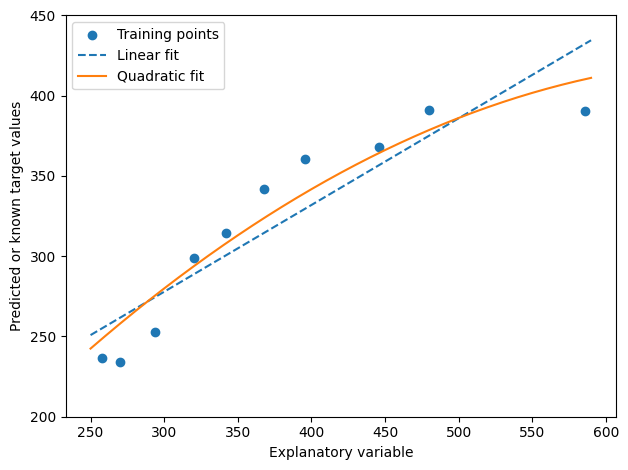

In [ ]:
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.ylim(200, 450)
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout();

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail().round(1)

,loss,epoch
49995,263.0,49995
49996,262.9,49996
49997,263.2,49997
49998,263.4,49998
49999,263.3,49999
